In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    weights=[0.95, 0.05],  
    random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


### WITHOUT SMOTE


In [3]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Metrics Before SMOTE:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")


Metrics Before SMOTE:
Accuracy: 0.9367
F1 Score: 0.2400
Precision: 0.6000
Recall: 0.1500


<Figure size 500x400 with 0 Axes>

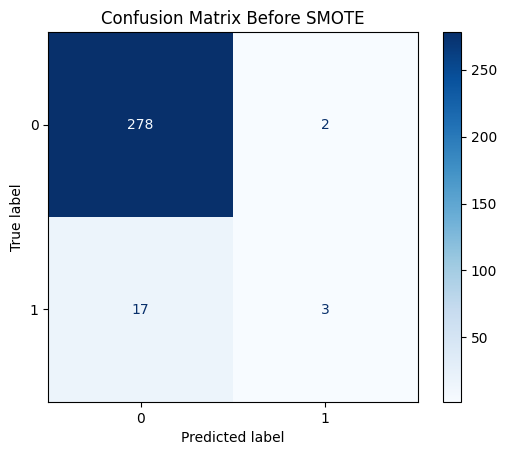

In [4]:
cm_before = confusion_matrix(y_test, y_pred)
disp_before = ConfusionMatrixDisplay(confusion_matrix=cm_before)
plt.figure(figsize=(5,4))
disp_before.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix Before SMOTE')
plt.show()

### WITH SMOTE

In [5]:
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

model_sm = LogisticRegression()
model_sm.fit(X_train_sm, y_train_sm)
y_pred_sm = model_sm.predict(X_test)

print("Metrics After SMOTE:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_sm):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_sm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_sm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_sm):.4f}")


Metrics After SMOTE:
Accuracy: 0.8767
F1 Score: 0.4478
Precision: 0.3191
Recall: 0.7500


<Figure size 500x400 with 0 Axes>

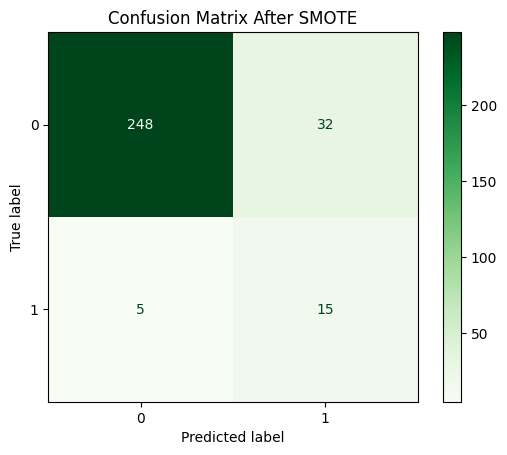

In [6]:
cm_after = confusion_matrix(y_test, y_pred_sm)
disp_after = ConfusionMatrixDisplay(confusion_matrix=cm_after)
plt.figure(figsize=(5,4))
disp_after.plot(cmap='Greens', values_format='d')
plt.title('Confusion Matrix After SMOTE')
plt.show()

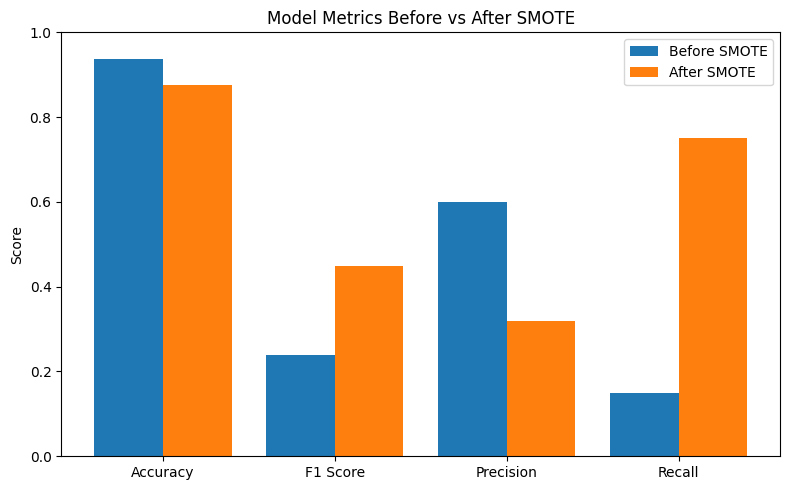

In [7]:
labels = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
before = [
    accuracy_score(y_test, y_pred),
    f1_score(y_test, y_pred),
    precision_score(y_test, y_pred),
    recall_score(y_test, y_pred)
]
after = [
    accuracy_score(y_test, y_pred_sm),
    f1_score(y_test, y_pred_sm),
    precision_score(y_test, y_pred_sm),
    recall_score(y_test, y_pred_sm)
]

x = range(len(labels))
plt.figure(figsize=(8,5))
plt.bar(x, before, width=0.4, label='Before SMOTE', align='center')
plt.bar([i + 0.4 for i in x], after, width=0.4, label='After SMOTE', align='center')
plt.xticks([i + 0.2 for i in x], labels)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Model Metrics Before vs After SMOTE')
plt.legend()
plt.tight_layout()
plt.show()


### Analysis: Why SMOTE Improves the Model

After applying **SMOTE**, we observe that:

- **Recall increased significantly** : from **0.15** to **0.75**, a more than 5x improvement.  
  This means the model is now much better at catching rare, anomalous cases.

- **Accuracy dropped slightly** : from **93%** to **87%**.  
  This happens because the model now predicts more positives (some of which are incorrect), slightly increasing the overall error rate.

- **Precision dropped** : due to more false positives. However, this is a tradeoff worth making when detecting rare events is more important than occasionally flagging a false alarm.

---

### Why Accuracy Is A Bad Metric

In highly imbalanced datasets :

- **Accuracy** is misleading. It is predicting only the majority class can still give over 90% accuracy without detecting any anomalies.
- **Recall** and **F1 Score** are better indicators. They reflect the model’s ability to detect rare but important cases.

Even with lower accuracy, a model with higher **recall** and **F1** is more useful and trustworthy in settings like anomaly detection.